In [2]:
import numpy  as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [4]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
    
    d1=1/(sigma*np.sqrt(T-0))*(np.log(S0/K)+(r+sigma**2/2)*(T-0))
    d2=d1-sigma*np.sqrt(T-0)
    
    c=norm.cdf(d1)*S0-norm.cdf(d2)*K*np.exp(-r*(T-0))
    p=norm.cdf(-d2)*K*np.exp(-r*(T-0))-norm.cdf(-d1)*S0
    
    return c,p
    return c, p

In [5]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
    np.random.seed(10)
    paths = np.zeros((numSteps + 1, numPaths))
    call_paths=np.zeros((1,numPaths))
    put_paths=np.zeros((1,numPaths))
    dT = T / numSteps
    
    # MC the price 
    paths[0] = [S0] * numPaths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    #calculted the payoff for each paths
    for iPath in range(numPaths):
        call_paths[0,iPath]=max((paths[numSteps, iPath]-K),0)
        put_paths[0,iPath]=max((K-paths[numSteps, iPath]),0)
    #discount back
    c=np.mean(call_paths)*np.exp(-r*T)
    p=np.mean(put_paths)*np.exp(-r*T)
    return c, p, paths


In [6]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
    np.random.seed(10)
    paths = np.zeros((numSteps + 1, numPaths))
    call_paths=np.zeros((1,numPaths))
    put_paths=np.zeros((1,numPaths))
    hit=np.zeros((1,numPaths))
    dT = T / numSteps
    paths[0] = [S0] * numPaths
    
    # MC the price 
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1))
    
    #calculted the payoff for each paths
    for iPath in range(numPaths):
        hit[0,iPath] = np.sum(paths[:,iPath] >= Sb)
        if hit[0,iPath]>0:
            call_paths[0,iPath]=max((paths[numSteps, iPath]-K),0)
            put_paths[0,iPath]=max((K-paths[numSteps, iPath]),0)
        else:
            call_paths[0,iPath]=0
            put_paths[0,iPath]=0
            
    #discount back
    c=np.mean(call_paths)*np.exp(-r*T)
    p=np.mean(put_paths)*np.exp(-r*T)
    return c, p


In [7]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 10;
numPaths = 1000000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price =BS_european_price(S0,K,T,r,sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step,MC_path_1_step = MC_european_price (S0, K, T, r, mu, sigma,1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step,MC_path_mul_step = MC_european_price (S0, K, T, r, mu, sigma,numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.01218579826472
One-step MC price of an European put option is 7.900938483557013
Multi-step MC price of an European call option is 8.029107363421803
Multi-step MC price of an European put option is 7.891191125508258
One-step MC price of an Barrier call option is 7.799808567229427
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 7.961046512344915
Multi-step MC price of an Barrier put option is 1.193882216618115


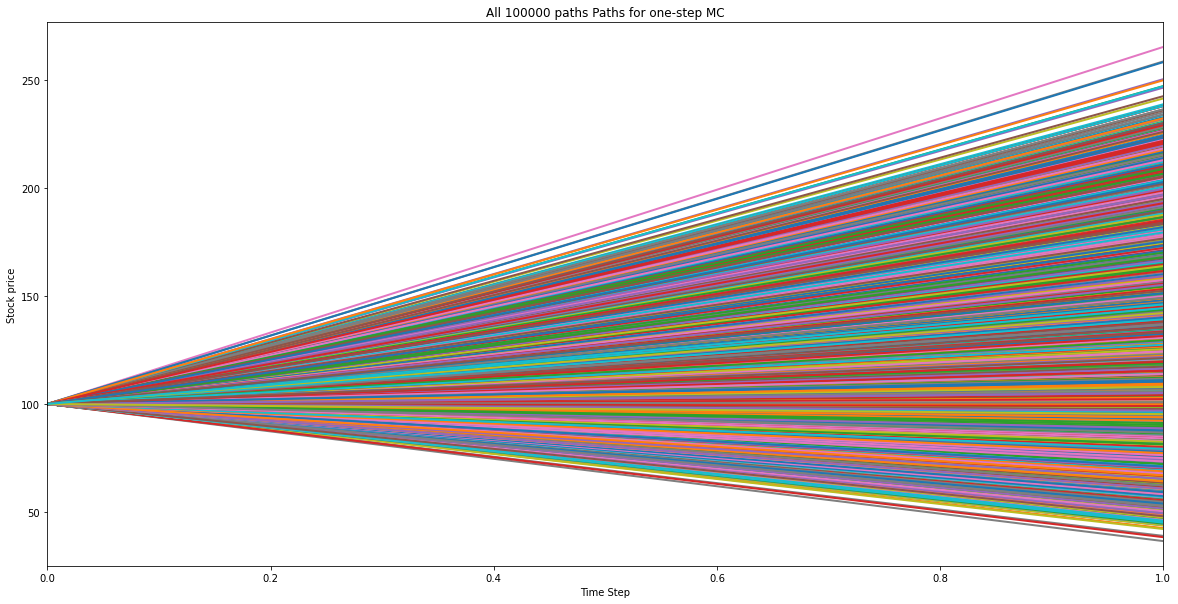

In [8]:
# Plot results
plt.figure(figsize = (20,10))
[plt.plot(MC_path_1_step[:,i], linewidth=2) for i in range(numPaths)]
plt.xlim([0,1])
plt.xlabel('Time Step')
plt.title('All 100000 paths Paths for one-step MC')
plt.ylabel('Stock price')
plt.show()

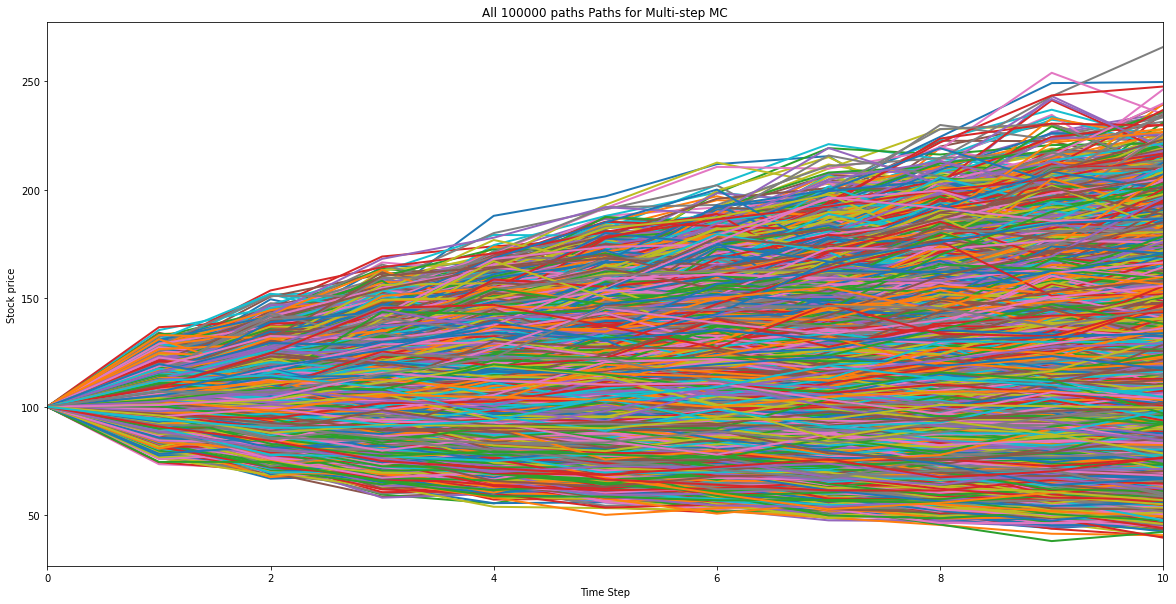

In [11]:
plt.figure(figsize = (20,10))
[plt.plot(MC_path_mul_step[:,i], linewidth=2) for i in range(numPaths)]
plt.xlabel('Time Step')
plt.xlim((0, numSteps))
plt.title('All 100000 paths Paths for Multi-step MC')
plt.ylabel('Stock price')
plt.show()

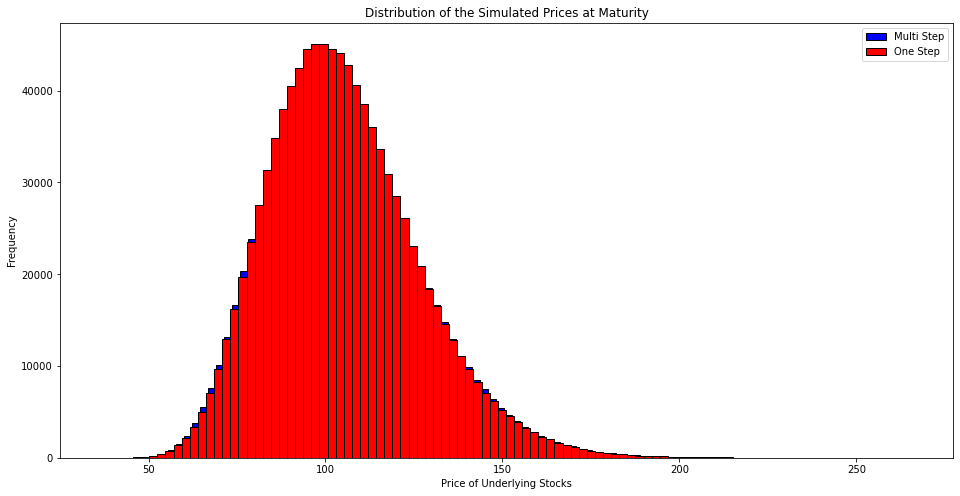

In [13]:
MC_path_mul_step_df=pd.DataFrame(MC_path_mul_step)
MC_path_one_step_df=pd.DataFrame(MC_path_1_step)
plt.figure(figsize = (16,8))
plt.hist(MC_path_mul_step_df.iloc[-1,:], color='blue',edgecolor = 'black',
         bins = 100,label='Multi Step')
plt.xlabel('Price of Underlying Stocks')
plt.ylabel('Frequency')

plt.title('Distribution of the Simulated Prices at Maturity')

plt.hist(MC_path_one_step_df.iloc[-1,:], color='red',edgecolor = 'black',
         bins = 100,label='One Step')

plt.legend()

plt.show()

In [46]:
#increase by 10%

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step_10_up, putMC_Barrier_Knockin_Price_1_step_10_up = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)
# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step_10_up, putMC_Barrier_Knockin_Price_multi_step_10_up =MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma*1.1, numSteps, numPaths)


#drease by 10%

callMC_Barrier_Knockin_Price_1_step_10_down, putMC_Barrier_Knockin_Price_1_step_10_down = MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)
# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step_10_down, putMC_Barrier_Knockin_Price_multi_step_10_down =MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma*0.9, numSteps, numPaths)


#print results
print('One-step MC price (10% increase Volatility) of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step_10_up)) 
print('One-step MC price (10% increase Volatility) of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step_10_up)) 
print('Multi-step MC price (10% increase Volatility) of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step_10_up)) 
print('Multi-step MC price (10% increase Volatility) of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step_10_up))

print('One-step MC price (10% decrease Volatility) of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step_10_down)) 
print('One-step MC price (10% decrease Volatility) of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step_10_down)) 
print('Multi-step MC price (10% decrease Volatility) of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step_10_down)) 
print('Multi-step MC price (10% decrease Volatility) of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step_10_down))

One-step MC price (10% increase Volatility) of an Barrier call option is 8.611163324305105
One-step MC price (10% increase Volatility) of an Barrier put option is 0.0
Multi-step MC price (10% increase Volatility) of an Barrier call option is 8.765641457602298
Multi-step MC price (10% increase Volatility) of an Barrier put option is 1.4969380226468545
One-step MC price (10% decrease Volatility) of an Barrier call option is 6.983193681290056
One-step MC price (10% decrease Volatility) of an Barrier put option is 0.0
Multi-step MC price (10% decrease Volatility) of an Barrier call option is 7.151894707237615
Multi-step MC price (10% decrease Volatility) of an Barrier put option is 0.9122353001032933


In [14]:
numSteps_list = [1,12,52,252] #yearly, monthly,weekly,daily
numPaths_list = [10000,100000,500000,1000000] #different steps 
optimum_step=[]
optimum_path=[]
optimum_call_price=[]
optimum_put_price=[]
for steps_temp in numSteps_list:
    for paths_temp in numPaths_list:
        call_temp,put_temp,path_temp=MC_european_price(S0, K, T, r, mu, sigma,steps_temp, paths_temp)
        
        residual_call=abs(call_BS_European_Price-call_temp)
        residual_put=abs(putBS_European_Price-put_temp)
        
        if residual_call<0.01 and residual_put<0.01:
            optimum_step.append(steps_temp)
            optimum_path.append(paths_temp)
            optimum_call_price.append(call_temp)
            optimum_put_price.append(put_temp)

In [15]:
optimum_step

[1, 12]

In [16]:
optimum_path

[1000000, 500000]

In [17]:
optimum_call_price

[8.01218579826472, 8.0224274349904]

In [18]:
optimum_put_price

[7.900938483557013, 7.895116928653468]

In [20]:
np.sum(MC_path_one_step_df.iloc[-1,:]>110)

371470

In [21]:
np.sum(MC_path_one_step_df.iloc[-1,:]<110)

628530

In [34]:
np.sum(MC_path_one_step_df.iloc[-1,:]<105)

537500

In [23]:
np.sum(MC_path_one_step_df.iloc[-1,:]>105)

462500

In [42]:
np.sum(np.sum(MC_path_mul_step_df.iloc[1:,:]>110))

2696086

In [43]:
np.sum(np.sum(MC_path_mul_step_df.iloc[1:,:]<110))

7303914

In [44]:
np.sum(np.sum(MC_path_mul_step_df.iloc[1:,:]<105))

6087747

In [45]:
np.sum(np.sum(MC_path_mul_step_df.iloc[1:,:]>105))

3912253